**Linear Models**

**Task**: Linear Model in Tensorflow for MNIST Handwriting Recognintion Data 
* Convert the model into Deep Neural Network Model          
* Playing with Hidden Layers and other parameters            
* Visualizing Data                      
* NN in Tensorflow for MNIST Fashion Data



**Step 1: Loading Google Drive**

In [0]:
from google.colab import drive
drive.mount('gdrive')
%cd /content/gdrive/My\ Drive/Study/IDL_Assignments

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gdrive
/content/gdrive/My Drive/Study/IDL_Assignments


**Step 2: Importing Libraries**

In [0]:
%tensorflow_version 2.x
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datasets import MNISTDataset

In [128]:

print(np.version.full_version)

1.18.3


**Step 3: Loading Data** 

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(training_images, training_labels),(testing_images, testing_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**Step 4: Visualizing Data** 

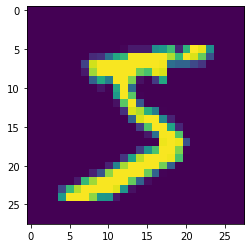

In [0]:
plt.imshow(training_images[0])

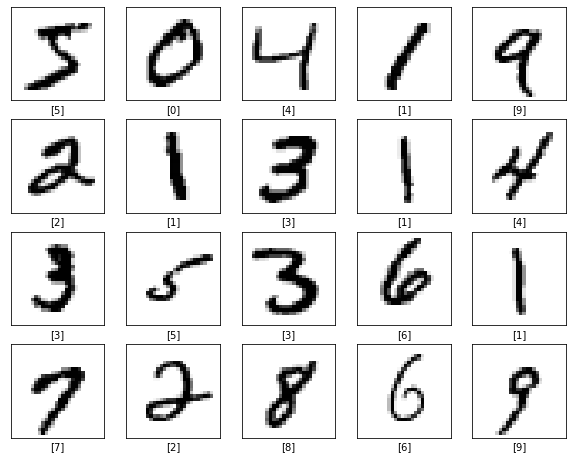

In [0]:
plt.figure(figsize=(10,10))
for i in range (20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(training_images[i],cmap = plt.cm.binary)
  plt.xlabel([training_labels[i]])

In [0]:
shape_of_train_data = training_images.shape
shape_of_test_data  = testing_images.shape
num_of_train_data   = training_images.shape[0]
num_of_test_data    = testing_images.shape[0]
shape_of_image_hor  = training_images.shape[1]
shape_of_image_vert = training_images.shape[2]
number_of_dimensions= shape_of_image_hor*shape_of_image_vert

label_list =[]
for label in training_labels:
  if label not in label_list:
    label_list.append(label)
number_of_labels = len(label_list)

In [0]:
print('shape of training_data: '+ str(shape_of_train_data))
print('shape of testing_data : '+ str(shape_of_test_data))
print('num of training data  : '+ str(num_of_train_data))
print('num of testing data   : '+ str(num_of_test_data))
print('shape of an image     : '+ str(shape_of_image_hor) + ' x ' + str(shape_of_image_vert) + ' pixels')
print('Number of Dimensions  : '+ str(number_of_dimensions))
print('labels                : '+ str(sorted(label_list)))
print('Number of Labels      : '+ str(number_of_labels))

shape of training_data: (60000, 28, 28)
shape of testing_data : (10000, 28, 28)
num of training data  : 60000
num of testing data   : 10000
shape of an image     : 28 x 28 pixels
Number of Dimensions  : 784
labels                : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Number of Labels      : 10


In [0]:
print('Raw image with Pixel Values: ')
print(training_images[0])

Raw image with Pixel Values: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 

**Step 5: Flattening the Image**


In [0]:
data = MNISTDataset(training_images.reshape([-1,number_of_dimensions]),training_labels,
                    testing_images.reshape([-1,number_of_dimensions]),testing_labels, 
                                           batch_size=128 )


In [0]:
print('New shape of Training Images: ' + str(data.train_data.shape))
print('New shape of Testing Images : ' + str(data.test_data.shape))

New shape of Training Images: (60000, 784)
New shape of Testing Images : (10000, 784)


**Step 6: Defining Hyperparameters**

Model 1:- 
________________________________________________________________________________
* No. of Hidden Layers      = 1
* Number of Units in Layers = 128
* Learinng Rate             = 0.1
* Initialization of Bias    = between -0.1 to 0.1
* Initialization of weights = between -0.1 to 0.1
* Hidden Layer Act. Func.   = relu
* Output Layer Act. Func.   = softmax with cross entropy loss function
* Input Batch Size          = 128
* Number of Steps           = 2000
* Standrdization of Input   = True(data/255)

In [0]:
num_of_steps = 2000
learning_rate1 = 0.1
number_of_units_in_layer1 = 128

In [0]:
w1 = tf.Variable(tf.random.uniform([number_of_dimensions,number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b1 = tf.Variable(tf.random.uniform([number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

w2 = tf.Variable(tf.random.uniform([number_of_units_in_layer1,number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b2 = tf.Variable(tf.random.uniform([number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

In [305]:
print('Shape of weight matrix of hidden layer "w1": ' + str(w1.shape))
print('Shape of bias matrix of hidden layer "b1"  : ' + str(b1.shape))

print('Shape of weight matrix of output layer "w2": ' + str(w2.shape))
print('Shape of bias matrix of output layer "b2"  : ' + str(b2.shape))

Shape of weight matrix of hidden layer "w1": (784, 128)
Shape of bias matrix of hidden layer "b1"  : (128,)
Shape of weight matrix of output layer "w2": (128, 10)
Shape of bias matrix of output layer "b2"  : (10,)


**Step 7: Designing and Training the Model**

In [306]:
loss_list = []
step_list = []
for step in range(num_of_steps):
  image_batch,label_batch = data.next_batch()  #This will update the batch size after every steps
  with tf.GradientTape() as tape:#for monitoring every change to tensors
    #logits1 = tf.matmul(image_batch,w1)+b1# image_batch.shape = (128 x 784), w1.shape= (784x128), 
    # image_batch x w1 = logits1, logits1 = (128x128)
    hidden1 = tf.nn.relu(tf.matmul(image_batch,w1)+b1)
    logits = tf.matmul(hidden1,w2)+b2

    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=label_batch))
    loss_list.append(loss)
  grads = tape.gradient(loss, [w2,b2,w1,b1])
  w2.assign_sub(learning_rate1*grads[0])#updating weights
  b2.assign_sub(learning_rate1*grads[1])#updating 
  w1.assign_sub(learning_rate1*grads[2])
  b1.assign_sub(learning_rate1*grads[3])
  
  step_list.append(step)
  

  if not step%100:# updating after 100 steps only
    preds = tf.argmax(logits,axis = 1, output_type = tf.int32)#selecting max value's index
    acc   = (tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),tf.float32)))*100# comparing predicted value and actual value
    #returning a binary output. Further checking number of correct classification and calculating accuracy.
    print("Loss: {}, Accuracy on Training Data: {}".format(loss,acc))
    
#

Loss: 2.338343620300293, Accuracy on Training Data: 7.03125
Loss: 0.4204779267311096, Accuracy on Training Data: 90.625
Loss: 0.3185511827468872, Accuracy on Training Data: 92.96875
Loss: 0.32119524478912354, Accuracy on Training Data: 89.0625
Starting new epoch...
Loss: 0.446929395198822, Accuracy on Training Data: 86.71875
Loss: 0.3700522780418396, Accuracy on Training Data: 88.28125
Loss: 0.2777585983276367, Accuracy on Training Data: 93.75
Loss: 0.2765805125236511, Accuracy on Training Data: 95.3125
Loss: 0.12582474946975708, Accuracy on Training Data: 96.09375
Starting new epoch...
Loss: 0.26248180866241455, Accuracy on Training Data: 93.75
Loss: 0.16232535243034363, Accuracy on Training Data: 94.53125
Loss: 0.2973575294017792, Accuracy on Training Data: 91.40625
Loss: 0.18803671002388, Accuracy on Training Data: 95.3125
Loss: 0.26079872250556946, Accuracy on Training Data: 94.53125
Starting new epoch...
Loss: 0.23463092744350433, Accuracy on Training Data: 92.96875
Loss: 0.153506

**Step 8: Accuracy on Testing Data**

In [307]:
test_prediction1 = tf.nn.relu(tf.matmul(data.test_data,w1)+b1)
test_predictions = tf.argmax(tf.matmul(test_prediction1,w2)+b2, axis = 1, output_type= tf.int32)
acc = (tf.reduce_mean(tf.cast(tf.equal(test_predictions, data.test_labels),tf.float32)))*100
print(' Accuracy on Testing Data: {}'.format(acc))

 Accuracy on Testing Data: 94.81999969482422


Text(0, 0.5, 'Loss')

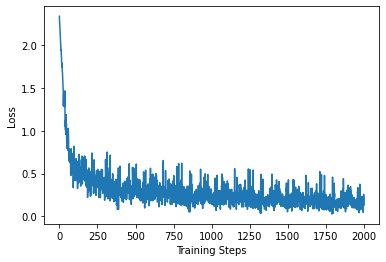

In [308]:
plt.figure()
plt.plot(step_list,loss_list)
plt.xlabel('Training Steps')
plt.ylabel('Loss')

**Step 9: Partial validation - Temporary**

In [0]:
ind1, ind2,ind3,ind4,ind5 = 5678, 8765, 6857, 85, 9

check 1:

      Model Prediction: 8


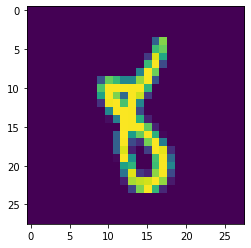

In [310]:
plt.imshow(testing_images[ind1])
plt.show
print('      Model Prediction: {}'.format(test_predictions[ind1]))

check 2:

      Model Prediction: 0


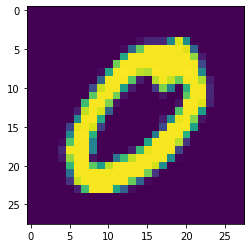

In [311]:
plt.imshow(testing_images[ind2])
plt.show
print('      Model Prediction: {}'.format(test_predictions[ind2]))

check 3:

      Model Prediction: 3


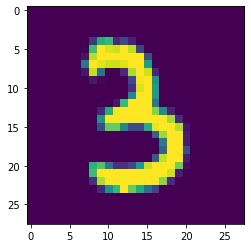

In [312]:
plt.imshow(testing_images[ind3])
plt.show
print('      Model Prediction: {}'.format(test_predictions[ind3]))

check 4:

      Model Prediction: 4


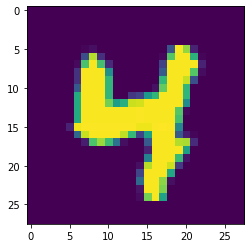

In [313]:
plt.imshow(testing_images[ind4])
plt.show
print('      Model Prediction: {}'.format(test_predictions[ind4]))

check 5:

      Model Prediction: 9


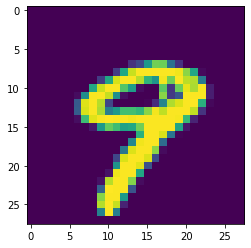

In [314]:
plt.imshow(testing_images[ind5])
plt.show
print('      Model Prediction: {}'.format(test_predictions[ind5]))

Model 2:-  Changing Number of Units in Hidden Layer
________________________________________________________________________________
* No. of Hidden Layers      = 1
* Number of Units in Layers = 512(changed)
* Learinng Rate             = 0.1
* Initialization of Bias    = between -0.1 to 0.1
* Initialization of weights = between -0.1 to 0.1
* Hidden Layer Act. Func.   = relu
* Output Layer Act. Func.   = softmax with cross entropy loss function
* Input Batch Size          = 128
* Number of Steps           = 2000
* Standrdization of Input   = True(data/255)

In [318]:
loss_list = []
step_list = []
num_of_steps = 2000
learning_rate1 = 0.1
number_of_units_in_layer1 = 512

w1 = tf.Variable(tf.random.uniform([number_of_dimensions,number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b1 = tf.Variable(tf.random.uniform([number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

w2 = tf.Variable(tf.random.uniform([number_of_units_in_layer1,number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b2 = tf.Variable(tf.random.uniform([number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

print('Shape of weight matrix of hidden layer "w1": ' + str(w1.shape))
print('Shape of bias matrix of hidden layer "b1"  : ' + str(b1.shape))

print('Shape of weight matrix of output layer "w2": ' + str(w2.shape))
print('Shape of bias matrix of output layer "b2"  : ' + str(b2.shape))
print('- '*40)

for step in range(num_of_steps):
  image_batch,label_batch = data.next_batch()
  #This will update the batch size after every steps
  with tf.GradientTape() as tape:#for monitoring every change to tensors
    #logits1 = tf.matmul(image_batch,w1)+b1# image_batch.shape = (128 x 784), w1.shape= (784x128), 
    # image_batch x w1 = logits1, logits1 = (128x128)
    hidden1 = tf.nn.relu(tf.matmul(image_batch,w1)+b1)
    logits = tf.matmul(hidden1,w2)+b2
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=label_batch))
    loss_list.append(loss)
  grads = tape.gradient(loss, [w2,b2,w1,b1])
  w2.assign_sub(learning_rate1*grads[0])#updating weights
  b2.assign_sub(learning_rate1*grads[1])#updating 
  w1.assign_sub(learning_rate1*grads[2])
  b1.assign_sub(learning_rate1*grads[3])
  step_list.append(step)
  if not step%100:# updating after 100 steps only
    preds = tf.argmax(logits,axis = 1, output_type = tf.int32)#selecting max value's index
    acc   = (tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),tf.float32)))*100# comparing predicted value and actual value
    #returning a binary output. Further checking number of correct classification and calculating accuracy.
    print("Loss: {}, Accuracy on Training Data: {}".format(loss,acc))

print('- '*40)

test_prediction1 = tf.nn.relu(tf.matmul(data.test_data,w1)+b1)
test_predictions = tf.argmax(tf.matmul(test_prediction1,w2)+b2, axis = 1, output_type= tf.int32)
acc = (tf.reduce_mean(tf.cast(tf.equal(test_predictions, data.test_labels),tf.float32)))*100
print('Accuracy on Testing Data: {}'.format(acc))

Shape of weight matrix of hidden layer "w1": (784, 512)
Shape of bias matrix of hidden layer "b1"  : (512,)
Shape of weight matrix of output layer "w2": (512, 10)
Shape of bias matrix of output layer "b2"  : (10,)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Loss: 2.4362759590148926, Accuracy on Training Data: 10.9375
Loss: 0.6107624769210815, Accuracy on Training Data: 85.15625
Loss: 0.29974716901779175, Accuracy on Training Data: 89.84375
Loss: 0.4017343819141388, Accuracy on Training Data: 89.0625
Starting new epoch...
Loss: 0.26868200302124023, Accuracy on Training Data: 91.40625
Loss: 0.3694860339164734, Accuracy on Training Data: 91.40625
Loss: 0.16913478076457977, Accuracy on Training Data: 95.3125
Loss: 0.2566157579421997, Accuracy on Training Data: 90.625
Loss: 0.10516759008169174, Accuracy on Training Data: 96.875
Starting new epoch...
Loss: 0.47493821382522583, Accuracy on Training Data: 88.28125
Loss: 0.2739260196685791, Accuracy on Train

Text(0, 0.5, 'Loss')

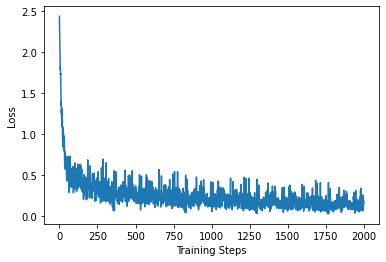

In [319]:
plt.figure()
plt.plot(step_list,loss_list)
plt.xlabel('Training Steps')
plt.ylabel('Loss')

Model 3:- Changing Number of Units in Hidden Layer
________________________________________________________________________________
* No. of Hidden Layers      = 1
* Number of Units in Layers = 1024(changed)
* Learinng Rate             = 0.1
* Initialization of Bias    = between -0.1 to 0.1
* Initialization of weights = between -0.1 to 0.1
* Hidden Layer Act. Func.   = relu
* Output Layer Act. Func.   = softmax with cross entropy loss function
* Input Batch Size          = 128
* Number of Steps           = 2000
* Standrdization of Input   = True(data/255)

In [320]:
num_of_steps = 2000
learning_rate1 = 0.1
number_of_units_in_layer1 = 1024

w1 = tf.Variable(tf.random.uniform([number_of_dimensions,number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b1 = tf.Variable(tf.random.uniform([number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

w2 = tf.Variable(tf.random.uniform([number_of_units_in_layer1,number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b2 = tf.Variable(tf.random.uniform([number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

print('Shape of weight matrix of hidden layer "w1": ' + str(w1.shape))
print('Shape of bias matrix of hidden layer "b1"  : ' + str(b1.shape))

print('Shape of weight matrix of output layer "w2": ' + str(w2.shape))
print('Shape of bias matrix of output layer "b2"  : ' + str(b2.shape))
print('- '*40)

for step in range(num_of_steps):
  image_batch,label_batch = data.next_batch()
  #This will update the batch size after every steps
  with tf.GradientTape() as tape:#for monitoring every change to tensors
    #logits1 = tf.matmul(image_batch,w1)+b1# image_batch.shape = (128 x 784), w1.shape= (784x128), 
    # image_batch x w1 = logits1, logits1 = (128x128)
    hidden1 = tf.nn.relu(tf.matmul(image_batch,w1)+b1)
    logits = tf.matmul(hidden1,w2)+b2
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=label_batch))
  grads = tape.gradient(loss, [w2,b2,w1,b1])
  w2.assign_sub(learning_rate1*grads[0])#updating weights
  b2.assign_sub(learning_rate1*grads[1])#updating 
  w1.assign_sub(learning_rate1*grads[2])
  b1.assign_sub(learning_rate1*grads[3])

  if not step%100:# updating after 100 steps only
    preds = tf.argmax(logits,axis = 1, output_type = tf.int32)#selecting max value's index
    acc   = (tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),tf.float32)))*100# comparing predicted value and actual value
    #returning a binary output. Further checking number of correct classification and calculating accuracy.
    print("Loss: {}, Accuracy on Training Data: {}".format(loss,acc))

print('- '*40)

test_prediction1 = tf.nn.relu(tf.matmul(data.test_data,w1)+b1)
test_predictions = tf.argmax(tf.matmul(test_prediction1,w2)+b2, axis = 1, output_type= tf.int32)
acc = (tf.reduce_mean(tf.cast(tf.equal(test_predictions, data.test_labels),tf.float32)))*100
print('Accuracy on Testing Data: {}'.format(acc))

Shape of weight matrix of hidden layer "w1": (784, 1024)
Shape of bias matrix of hidden layer "b1"  : (1024,)
Shape of weight matrix of output layer "w2": (1024, 10)
Shape of bias matrix of output layer "b2"  : (10,)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Loss: 2.514972686767578, Accuracy on Training Data: 20.3125
Loss: 0.5453484058380127, Accuracy on Training Data: 81.25
Loss: 0.22553180158138275, Accuracy on Training Data: 94.53125
Starting new epoch...
Loss: 0.4078855812549591, Accuracy on Training Data: 85.15625
Loss: 0.35561004281044006, Accuracy on Training Data: 90.625
Loss: 0.23094165325164795, Accuracy on Training Data: 93.75
Loss: 0.4183497726917267, Accuracy on Training Data: 88.28125
Loss: 0.04543521627783775, Accuracy on Training Data: 99.21875
Starting new epoch...
Loss: 0.1681155562400818, Accuracy on Training Data: 95.3125
Loss: 0.24125880002975464, Accuracy on Training Data: 90.625
Loss: 0.4346414804458618, Accuracy on Training

Model 4:- Changing Learning Rate
________________________________________________________________________________
* No. of Hidden Layers      = 1
* Number of Units in Layer1 = 128
* Learinng Rate             = 0.05(changed)
* Initialization of Bias    = between -0.1 to 0.1
* Initialization of weights = between -0.1 to 0.1
* Hidden Layer Act. Func.   = relu
* Output Layer Act. Func.   = softmax with cross entropy loss function
* Input Batch Size          = 128
* Number of Steps           = 2000
* Standrdization of Input   = True(data/255)

In [321]:
num_of_steps = 2000
learning_rate1 = 0.05
number_of_units_in_layer1 = 128

w1 = tf.Variable(tf.random.uniform([number_of_dimensions,number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b1 = tf.Variable(tf.random.uniform([number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

w2 = tf.Variable(tf.random.uniform([number_of_units_in_layer1,number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b2 = tf.Variable(tf.random.uniform([number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

print('Shape of weight matrix of hidden layer "w1": ' + str(w1.shape))
print('Shape of bias matrix of hidden layer "b1"  : ' + str(b1.shape))

print('Shape of weight matrix of output layer "w2": ' + str(w2.shape))
print('Shape of bias matrix of output layer "b2"  : ' + str(b2.shape))
print('- '*40)

for step in range(num_of_steps):
  image_batch,label_batch = data.next_batch()
  #This will update the batch size after every steps
  with tf.GradientTape() as tape:#for monitoring every change to tensors
    #logits1 = tf.matmul(image_batch,w1)+b1# image_batch.shape = (128 x 784), w1.shape= (784x128), 
    # image_batch x w1 = logits1, logits1 = (128x128)
    hidden1 = tf.nn.relu(tf.matmul(image_batch,w1)+b1)
    logits = tf.matmul(hidden1,w2)+b2
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=label_batch))
  grads = tape.gradient(loss, [w2,b2,w1,b1])
  w2.assign_sub(learning_rate1*grads[0])#updating weights
  b2.assign_sub(learning_rate1*grads[1])#updating 
  w1.assign_sub(learning_rate1*grads[2])
  b1.assign_sub(learning_rate1*grads[3])

  if not step%100:# updating after 100 steps only
    preds = tf.argmax(logits,axis = 1, output_type = tf.int32)#selecting max value's index
    acc   = (tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),tf.float32)))*100# comparing predicted value and actual value
    #returning a binary output. Further checking number of correct classification and calculating accuracy.
    print("Loss: {}, Accuracy on Training Data: {}".format(loss,acc))

print('- '*40)

test_prediction1 = tf.nn.relu(tf.matmul(data.test_data,w1)+b1)
test_predictions = tf.argmax(tf.matmul(test_prediction1,w2)+b2, axis = 1, output_type= tf.int32)
acc = (tf.reduce_mean(tf.cast(tf.equal(test_predictions, data.test_labels),tf.float32)))*100
print('Accuracy on Testing Data: {}'.format(acc))

Shape of weight matrix of hidden layer "w1": (784, 128)
Shape of bias matrix of hidden layer "b1"  : (128,)
Shape of weight matrix of output layer "w2": (128, 10)
Shape of bias matrix of output layer "b2"  : (10,)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Loss: 2.30680251121521, Accuracy on Training Data: 8.59375
Loss: 0.7192384004592896, Accuracy on Training Data: 89.0625
Starting new epoch...
Loss: 0.43997061252593994, Accuracy on Training Data: 90.625
Loss: 0.49477094411849976, Accuracy on Training Data: 85.9375
Loss: 0.34231042861938477, Accuracy on Training Data: 92.1875
Loss: 0.22628545761108398, Accuracy on Training Data: 93.75
Starting new epoch...
Loss: 0.26826614141464233, Accuracy on Training Data: 93.75
Loss: 0.2741021513938904, Accuracy on Training Data: 92.96875
Loss: 0.29379409551620483, Accuracy on Training Data: 92.96875
Loss: 0.31605982780456543, Accuracy on Training Data: 92.1875
Loss: 0.18059317767620087, Accuracy on Training D

Model 5:- Changing Bias Initialization
________________________________________________________________________________
* No. of Hidden Layers      = 1
* Number of Units in Layer1 = 128
* Learinng Rate             = 0.1
* Initialization of Bias    = 0(changed)
* Initialization of weights = between -0.1 to 0.1
* Hidden Layer Act. Func.   = relu
* Output Layer Act. Func.   = softmax with cross entropy loss function
* Input Batch Size          = 128
* Number of Steps           = 2000
* Standrdization of Input   = True(data/255)

In [322]:
num_of_steps = 2000
learning_rate1 = 0.1
number_of_units_in_layer1 = 128

w1 = tf.Variable(tf.random.uniform([number_of_dimensions,number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b1 = tf.Variable(np.zeros(number_of_units_in_layer1, dtype=np.float32))

w2 = tf.Variable(tf.random.uniform([number_of_units_in_layer1,number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b2 = tf.Variable(np.zeros(number_of_labels, dtype=np.float32))

print('Shape of weight matrix of hidden layer "w1": ' + str(w1.shape))
print('Shape of bias matrix of hidden layer "b1"  : ' + str(b1.shape))

print('Shape of weight matrix of output layer "w2": ' + str(w2.shape))
print('Shape of bias matrix of output layer "b2"  : ' + str(b2.shape))
print('- '*40)

for step in range(num_of_steps):
  image_batch,label_batch = data.next_batch()
  #This will update the batch size after every steps
  with tf.GradientTape() as tape:#for monitoring every change to tensors
    #logits1 = tf.matmul(image_batch,w1)+b1# image_batch.shape = (128 x 784), w1.shape= (784x128), 
    # image_batch x w1 = logits1, logits1 = (128x128)
    hidden1 = tf.nn.relu(tf.matmul(image_batch,w1)+b1)
    logits = tf.matmul(hidden1,w2)+b2
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=label_batch))
  grads = tape.gradient(loss, [w2,b2,w1,b1])
  w2.assign_sub(learning_rate1*grads[0])#updating weights
  b2.assign_sub(learning_rate1*grads[1])#updating 
  w1.assign_sub(learning_rate1*grads[2])
  b1.assign_sub(learning_rate1*grads[3])

  if not step%100:# updating after 100 steps only
    preds = tf.argmax(logits,axis = 1, output_type = tf.int32)#selecting max value's index
    acc   = (tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),tf.float32)))*100# comparing predicted value and actual value
    #returning a binary output. Further checking number of correct classification and calculating accuracy.
    print("Loss: {}, Accuracy on Training Data: {}".format(loss,acc))

print('- '*40)

test_prediction1 = tf.nn.relu(tf.matmul(data.test_data,w1)+b1)
test_predictions = tf.argmax(tf.matmul(test_prediction1,w2)+b2, axis = 1, output_type= tf.int32)
acc = (tf.reduce_mean(tf.cast(tf.equal(test_predictions, data.test_labels),tf.float32)))*100
print('Accuracy on Testing Data: {}'.format(acc))

Shape of weight matrix of hidden layer "w1": (784, 128)
Shape of bias matrix of hidden layer "b1"  : (128,)
Shape of weight matrix of output layer "w2": (128, 10)
Shape of bias matrix of output layer "b2"  : (10,)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Loss: 2.309208393096924, Accuracy on Training Data: 6.25
Loss: 0.708155632019043, Accuracy on Training Data: 78.125
Loss: 0.40107816457748413, Accuracy on Training Data: 89.84375
Loss: 0.36651185154914856, Accuracy on Training Data: 88.28125
Loss: 0.3408695459365845, Accuracy on Training Data: 91.40625
Starting new epoch...
Loss: 0.4237671196460724, Accuracy on Training Data: 88.28125
Loss: 0.2294282466173172, Accuracy on Training Data: 92.96875
Loss: 0.2883819043636322, Accuracy on Training Data: 90.625
Loss: 0.21853917837142944, Accuracy on Training Data: 92.1875
Loss: 0.17316365242004395, Accuracy on Training Data: 96.875
Starting new epoch...
Loss: 0.2613750398159027, Accuracy on Training Dat

Model 6:- Changing both Bias and Weights Initialization
________________________________________________________________________________
* No. of Hidden Layers      = 1
* Number of Units in Layer1 = 128
* Learinng Rate             = 0.1
* Initialization of Bias    = 0(changed)
* Initialization of weights = 0(changed)
* Hidden Layer Act. Func.   = relu
* Output Layer Act. Func.   = softmax with cross entropy loss function
* Input Batch Size          = 128
* Number of Steps           = 2000
* Standrdization of Input   = True(data/255)

In [326]:
num_of_steps = 2000
learning_rate1 = 0.1
number_of_units_in_layer1 = 128

w1 = tf.Variable(np.zeros([number_of_dimensions,number_of_units_in_layer1],dtype=np.float32))
b1 = tf.Variable(np.zeros(number_of_units_in_layer1, dtype=np.float32))

w2 = tf.Variable(np.zeros([number_of_units_in_layer1,number_of_labels],dtype=np.float32))
b2 = tf.Variable(np.zeros(number_of_labels, dtype=np.float32))

print('Shape of weight matrix of hidden layer "w1": ' + str(w1.shape))
print('Shape of bias matrix of hidden layer "b1"  : ' + str(b1.shape))

print('Shape of weight matrix of output layer "w2": ' + str(w2.shape))
print('Shape of bias matrix of output layer "b2"  : ' + str(b2.shape))
print('- '*40)

for step in range(num_of_steps):
  image_batch,label_batch = data.next_batch()
  #This will update the batch size after every steps
  with tf.GradientTape() as tape:#for monitoring every change to tensors
    #logits1 = tf.matmul(image_batch,w1)+b1# image_batch.shape = (128 x 784), w1.shape= (784x128), 
    # image_batch x w1 = logits1, logits1 = (128x128)
    hidden1 = tf.nn.relu(tf.matmul(image_batch,w1)+b1)
    logits = tf.matmul(hidden1,w2)+b2
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=label_batch))
  grads = tape.gradient(loss, [w2,b2,w1,b1])
  w2.assign_sub(learning_rate1*grads[0])#updating weights
  b2.assign_sub(learning_rate1*grads[1])#updating 
  w1.assign_sub(learning_rate1*grads[2])
  b1.assign_sub(learning_rate1*grads[3])

  if not step%100:# updating after 100 steps only
    preds = tf.argmax(logits,axis = 1, output_type = tf.int32)#selecting max value's index
    acc   = (tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),tf.float32)))*100# comparing predicted value and actual value
    #returning a binary output. Further checking number of correct classification and calculating accuracy.
    print("Loss: {}, Accuracy on Training Data: {}".format(loss,acc))

print('- '*40)

test_prediction1 = tf.nn.relu(tf.matmul(data.test_data,w1)+b1)
test_predictions = tf.argmax(tf.matmul(test_prediction1,w2)+b2, axis = 1, output_type= tf.int32)
acc = (tf.reduce_mean(tf.cast(tf.equal(test_predictions, data.test_labels),tf.float32)))*100
print('Accuracy on Testing Data: {}'.format(acc))

Shape of weight matrix of hidden layer "w1": (784, 128)
Shape of bias matrix of hidden layer "b1"  : (128,)
Shape of weight matrix of output layer "w2": (128, 10)
Shape of bias matrix of output layer "b2"  : (10,)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Loss: 2.3025851249694824, Accuracy on Training Data: 10.15625
Loss: 2.298942804336548, Accuracy on Training Data: 14.0625
Loss: 2.2992215156555176, Accuracy on Training Data: 13.28125
Loss: 2.303739547729492, Accuracy on Training Data: 9.375
Loss: 2.305567741394043, Accuracy on Training Data: 7.8125
Starting new epoch...
Loss: 2.299915075302124, Accuracy on Training Data: 12.5
Loss: 2.2965805530548096, Accuracy on Training Data: 14.84375
Loss: 2.299590587615967, Accuracy on Training Data: 10.15625
Loss: 2.309206962585449, Accuracy on Training Data: 9.375
Loss: 2.300436496734619, Accuracy on Training Data: 11.71875
Starting new epoch...
Loss: 2.30646014213562, Accuracy on Training Data: 9.375
Loss

Model 7:- Adding one more Layer(2 Hidden Layers)
________________________________________________________________________________
* No. of Hidden Layers      = 2(changed)
* Number of Units in Layer1 = 512(changed)
* Number of Units in Layer2 = 256(changed)
* Learinng Rate             = 0.1
* Initialization of Bias    = between -0.1 to 0.1
* Initialization of weights = between -0.1 to 0.1
* Hidden Layer Act. Func.   = relu
* Output Layer Act. Func.   = softmax with cross entropy loss function
* Input Batch Size          = 128
* Number of Steps           = 2000
* Standrdization of Input   = True(data/255)

In [327]:
num_of_steps = 2000
learning_rate1 = 0.1
number_of_units_in_layer1 = 512
number_of_units_in_layer2 = 256

w1 = tf.Variable(tf.random.uniform([number_of_dimensions,number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))#w1 matrix = (784 x 256)
b1 = tf.Variable(tf.random.uniform([number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))# b1 array = (256,)

w2 = tf.Variable(tf.random.uniform([number_of_units_in_layer1,number_of_units_in_layer2],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))#w2 matrix = (256 x 128)
b2 = tf.Variable(tf.random.uniform([number_of_units_in_layer2],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))# b2 array = (128,)

w3 = tf.Variable(tf.random.uniform([number_of_units_in_layer2,number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))# w3 matrix = (128 x 10)
b3 = tf.Variable(tf.random.uniform([number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))# b3 array = (10,)

print('Shape of weight matrix of hidden layer "w1": ' + str(w1.shape))
print('Shape of bias matrix of hidden layer "b1"  : ' + str(b1.shape))

print('Shape of weight matrix of output layer "w2": ' + str(w2.shape))
print('Shape of bias matrix of output layer "b2"  : ' + str(b2.shape))

print('Shape of weight matrix of output layer "w3": ' + str(w3.shape))
print('Shape of bias matrix of output layer "b3"  : ' + str(b3.shape))
print('- '*40)

for step in range(num_of_steps):
  image_batch,label_batch = data.next_batch()
  #This will update the batch size after every steps
  with tf.GradientTape() as tape:#for monitoring every change to tensors
    #logits1 = tf.matmul(image_batch,w1)+b1# image_batch.shape = (128 x 784), w1.shape= (784x128), 
    # image_batch x w1 = logits1, logits1 = (128x128)
    hidden1 = tf.nn.relu(tf.matmul(image_batch,w1)+b1)
    hidden2 = tf.nn.relu(tf.matmul(hidden1,w2)+b2)
    logits = tf.matmul(hidden2,w3)+b3
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=label_batch))

  grads = tape.gradient(loss, [w3,b3,w2,b2,w1,b1])
  w3.assign_sub(learning_rate1*grads[0])
  b3.assign_sub(learning_rate1*grads[1])
  w2.assign_sub(learning_rate1*grads[2])
  b2.assign_sub(learning_rate1*grads[3])
  w1.assign_sub(learning_rate1*grads[4])
  b1.assign_sub(learning_rate1*grads[5])

  if not step%100:# updating after 100 steps only
    preds = tf.argmax(logits,axis = 1, output_type = tf.int32)#selecting max value's index
    acc   = (tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),tf.float32)))*100# comparing predicted value and actual value
    #returning a binary output. Further checking number of correct classification and calculating accuracy.
    print("Loss: {}, Accuracy on Training Data: {}".format(loss,acc))

print('- '*40)

test_prediction1 = tf.nn.relu(tf.matmul(data.test_data,w1)+b1)
test_prediction2 = tf.nn.relu(tf.matmul(test_prediction1,w2)+b2)
test_predictions = tf.argmax(tf.matmul(test_prediction2,w3)+b3, axis = 1, output_type= tf.int32)
acc = (tf.reduce_mean(tf.cast(tf.equal(test_predictions, data.test_labels),tf.float32)))*100
print('Accuracy on Testing Data: {}'.format(acc))

Shape of weight matrix of hidden layer "w1": (784, 512)
Shape of bias matrix of hidden layer "b1"  : (512,)
Shape of weight matrix of output layer "w2": (512, 256)
Shape of bias matrix of output layer "b2"  : (256,)
Shape of weight matrix of output layer "w3": (256, 10)
Shape of bias matrix of output layer "b3"  : (10,)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Loss: 2.3419597148895264, Accuracy on Training Data: 10.9375
Loss: 0.5216265916824341, Accuracy on Training Data: 85.15625
Loss: 0.34011155366897583, Accuracy on Training Data: 89.84375
Loss: 0.060277312994003296, Accuracy on Training Data: 98.4375
Starting new epoch...
Loss: 0.40545785427093506, Accuracy on Training Data: 89.84375
Loss: 0.26789072155952454, Accuracy on Training Data: 90.625
Loss: 0.39508867263793945, Accuracy on Training Data: 89.0625
Loss: 0.1701984703540802, Accuracy on Training Data: 93.75
Starting new epoch...
Loss: 0.09673777222633362, Accuracy on Training Data: 98.43

Model 8:- Changing hidden Layer Activation Function to Softmax
________________________________________________________________________________
* No. of Hidden Layers      = 1
* Number of Units in Layers = 128
* Learinng Rate             = 0.1
* Initialization of Bias    = between -0.1 to 0.1
* Initialization of weights = between -0.1 to 0.1
* Hidden Layer Act. Func.   = softmax(changed)
* Output Layer Act. Func.   = softmax with cross entropy loss function
* Input Batch Size          = 128
* Number of Steps           = 2000
* Standrdization of Input   = True(data/255)

In [329]:
num_of_steps = 2000
learning_rate1 = 0.1
number_of_units_in_layer1 = 128

w1 = tf.Variable(tf.random.uniform([number_of_dimensions,number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b1 = tf.Variable(tf.random.uniform([number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

w2 = tf.Variable(tf.random.uniform([number_of_units_in_layer1,number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b2 = tf.Variable(tf.random.uniform([number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

print('Shape of weight matrix of hidden layer "w1": ' + str(w1.shape))
print('Shape of bias matrix of hidden layer "b1"  : ' + str(b1.shape))

print('Shape of weight matrix of output layer "w2": ' + str(w2.shape))
print('Shape of bias matrix of output layer "b2"  : ' + str(b2.shape))
print('- '*40)

for step in range(num_of_steps):
  image_batch,label_batch = data.next_batch()
  #This will update the batch size after every steps
  with tf.GradientTape() as tape:#for monitoring every change to tensors
    #logits1 = tf.matmul(image_batch,w1)+b1# image_batch.shape = (128 x 784), w1.shape= (784x128), 
    # image_batch x w1 = logits1, logits1 = (128x128)
    hidden1 = tf.nn.softmax(tf.matmul(image_batch,w1)+b1)
    logits = tf.matmul(hidden1,w2)+b2
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=label_batch))
  grads = tape.gradient(loss, [w2,b2,w1,b1])
  w2.assign_sub(learning_rate1*grads[0])#updating weights
  b2.assign_sub(learning_rate1*grads[1])#updating 
  w1.assign_sub(learning_rate1*grads[2])
  b1.assign_sub(learning_rate1*grads[3])

  if not step%100:# updating after 100 steps only
    preds = tf.argmax(logits,axis = 1, output_type = tf.int32)#selecting max value's index
    acc   = (tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),tf.float32)))*100# comparing predicted value and actual value
    #returning a binary output. Further checking number of correct classification and calculating accuracy.
    print("Loss: {}, Accuracy on Training Data: {}".format(loss,acc))

print('- '*40)

test_prediction1 = tf.nn.relu(tf.matmul(data.test_data,w1)+b1)
test_predictions = tf.argmax(tf.matmul(test_prediction1,w2)+b2, axis = 1, output_type= tf.int32)
acc = (tf.reduce_mean(tf.cast(tf.equal(test_predictions, data.test_labels),tf.float32)))*100
print('Accuracy on Testing Data: {}'.format(acc))

Shape of weight matrix of hidden layer "w1": (784, 128)
Shape of bias matrix of hidden layer "b1"  : (128,)
Shape of weight matrix of output layer "w2": (128, 10)
Shape of bias matrix of output layer "b2"  : (10,)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Loss: 2.3068089485168457, Accuracy on Training Data: 10.15625
Starting new epoch...
Loss: 2.2991223335266113, Accuracy on Training Data: 11.71875
Loss: 2.294884204864502, Accuracy on Training Data: 14.0625
Loss: 2.29677152633667, Accuracy on Training Data: 10.15625
Loss: 2.3011088371276855, Accuracy on Training Data: 9.375
Loss: 2.302393674850464, Accuracy on Training Data: 9.375
Starting new epoch...
Loss: 2.2898030281066895, Accuracy on Training Data: 13.28125
Loss: 2.2855870723724365, Accuracy on Training Data: 14.84375
Loss: 2.2367537021636963, Accuracy on Training Data: 21.875
Loss: 2.1544852256774902, Accuracy on Training Data: 27.34375
Starting new epoch...
Loss: 2.152606248855591, Accurac

Model 9:- Changing Activation function of Hidden Layer to Sigmoid
________________________________________________________________________________
* No. of Hidden Layers      = 1
* Number of Units in Layers = 128
* Learinng Rate             = 0.1
* Initialization of Bias    = between -0.1 to 0.1
* Initialization of weights = between -0.1 to 0.1
* Hidden Layer Act. Func.   = sigmoid(changed)
* Output Layer Act. Func.   = softmax with cross entropy loss function
* Input Batch Size          = 128
* Number of Steps           = 2000
* Standrdization of Input   = True(data/255)

In [330]:
num_of_steps = 2000
learning_rate1 = 0.1
number_of_units_in_layer1 = 128

w1 = tf.Variable(tf.random.uniform([number_of_dimensions,number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b1 = tf.Variable(tf.random.uniform([number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

w2 = tf.Variable(tf.random.uniform([number_of_units_in_layer1,number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b2 = tf.Variable(tf.random.uniform([number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

print('Shape of weight matrix of hidden layer "w1": ' + str(w1.shape))
print('Shape of bias matrix of hidden layer "b1"  : ' + str(b1.shape))

print('Shape of weight matrix of output layer "w2": ' + str(w2.shape))
print('Shape of bias matrix of output layer "b2"  : ' + str(b2.shape))
print('- '*40)

for step in range(num_of_steps):
  image_batch,label_batch = data.next_batch()
  #This will update the batch size after every steps
  with tf.GradientTape() as tape:#for monitoring every change to tensors
    #logits1 = tf.matmul(image_batch,w1)+b1# image_batch.shape = (128 x 784), w1.shape= (784x128), 
    # image_batch x w1 = logits1, logits1 = (128x128)
    hidden1 = tf.nn.sigmoid(tf.matmul(image_batch,w1)+b1)
    logits = tf.matmul(hidden1,w2)+b2
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=label_batch))
  grads = tape.gradient(loss, [w2,b2,w1,b1])
  w2.assign_sub(learning_rate1*grads[0])#updating weights
  b2.assign_sub(learning_rate1*grads[1])#updating 
  w1.assign_sub(learning_rate1*grads[2])
  b1.assign_sub(learning_rate1*grads[3])

  if not step%100:# updating after 100 steps only
    preds = tf.argmax(logits,axis = 1, output_type = tf.int32)#selecting max value's index
    acc   = (tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),tf.float32)))*100# comparing predicted value and actual value
    #returning a binary output. Further checking number of correct classification and calculating accuracy.
    print("Loss: {}, Accuracy on Training Data: {}".format(loss,acc))

print('- '*40)

test_prediction1 = tf.nn.relu(tf.matmul(data.test_data,w1)+b1)
test_predictions = tf.argmax(tf.matmul(test_prediction1,w2)+b2, axis = 1, output_type= tf.int32)
acc = (tf.reduce_mean(tf.cast(tf.equal(test_predictions, data.test_labels),tf.float32)))*100
print('Accuracy on Testing Data: {}'.format(acc))

Shape of weight matrix of hidden layer "w1": (784, 128)
Shape of bias matrix of hidden layer "b1"  : (128,)
Shape of weight matrix of output layer "w2": (128, 10)
Shape of bias matrix of output layer "b2"  : (10,)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Loss: 2.3073863983154297, Accuracy on Training Data: 14.0625
Loss: 1.717108130455017, Accuracy on Training Data: 65.625
Loss: 1.0546422004699707, Accuracy on Training Data: 80.46875
Loss: 0.7100820541381836, Accuracy on Training Data: 85.9375
Loss: 0.7070584297180176, Accuracy on Training Data: 83.59375
Starting new epoch...
Loss: 0.5071094036102295, Accuracy on Training Data: 90.625
Loss: 0.5381547808647156, Accuracy on Training Data: 85.9375
Loss: 0.48638176918029785, Accuracy on Training Data: 87.5
Loss: 0.42770659923553467, Accuracy on Training Data: 89.84375
Starting new epoch...
Loss: 0.37607866525650024, Accuracy on Training Data: 89.0625
Loss: 0.4929811358451843, Accuracy on Training Data

Model 10:- Changing Activation function of Hidden Layer to tanh
________________________________________________________________________________
* No. of Hidden Layers      = 1
* Number of Units in Layers = 128
* Learinng Rate             = 0.1
* Initialization of Bias    = between -0.1 to 0.1
* Initialization of weights = between -0.1 to 0.1
* Hidden Layer Act. Func.   = tanh(changed)
* Output Layer Act. Func.   = softmax with cross entropy loss function
* Input Batch Size          = 128
* Number of Steps           = 2000
* Standrdization of Input   = True(data/255)

In [335]:
num_of_steps = 2000
learning_rate1 = 0.1
number_of_units_in_layer1 = 128

w1 = tf.Variable(tf.random.uniform([number_of_dimensions,number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b1 = tf.Variable(tf.random.uniform([number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

w2 = tf.Variable(tf.random.uniform([number_of_units_in_layer1,number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b2 = tf.Variable(tf.random.uniform([number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

print('Shape of weight matrix of hidden layer "w1": ' + str(w1.shape))
print('Shape of bias matrix of hidden layer "b1"  : ' + str(b1.shape))

print('Shape of weight matrix of output layer "w2": ' + str(w2.shape))
print('Shape of bias matrix of output layer "b2"  : ' + str(b2.shape))
print('- '*40)

for step in range(num_of_steps):
  image_batch,label_batch = data.next_batch()
  #This will update the batch size after every steps
  with tf.GradientTape() as tape:#for monitoring every change to tensors
    #logits1 = tf.matmul(image_batch,w1)+b1# image_batch.shape = (128 x 784), w1.shape= (784x128), 
    # image_batch x w1 = logits1, logits1 = (128x128)
    hidden1 = tf.nn.tanh(tf.matmul(image_batch,w1)+b1)
    logits = tf.matmul(hidden1,w2)+b2
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=label_batch))
  grads = tape.gradient(loss, [w2,b2,w1,b1])
  w2.assign_sub(learning_rate1*grads[0])#updating weights
  b2.assign_sub(learning_rate1*grads[1])#updating 
  w1.assign_sub(learning_rate1*grads[2])
  b1.assign_sub(learning_rate1*grads[3])

  if not step%100:# updating after 100 steps only
    preds = tf.argmax(logits,axis = 1, output_type = tf.int32)#selecting max value's index
    acc   = (tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),tf.float32)))*100# comparing predicted value and actual value
    #returning a binary output. Further checking number of correct classification and calculating accuracy.
    print("Loss: {}, Accuracy on Training Data: {}".format(loss,acc))

print('- '*40)

test_prediction1 = tf.nn.relu(tf.matmul(data.test_data,w1)+b1)
test_predictions = tf.argmax(tf.matmul(test_prediction1,w2)+b2, axis = 1, output_type= tf.int32)
acc = (tf.reduce_mean(tf.cast(tf.equal(test_predictions, data.test_labels),tf.float32)))*100
print('Accuracy on Testing Data: {}'.format(acc))

Shape of weight matrix of hidden layer "w1": (784, 128)
Shape of bias matrix of hidden layer "b1"  : (128,)
Shape of weight matrix of output layer "w2": (128, 10)
Shape of bias matrix of output layer "b2"  : (10,)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Loss: 2.3390355110168457, Accuracy on Training Data: 7.8125
Loss: 0.5458412766456604, Accuracy on Training Data: 85.9375
Loss: 0.4175414741039276, Accuracy on Training Data: 89.0625
Loss: 0.39546820521354675, Accuracy on Training Data: 91.40625
Starting new epoch...
Loss: 0.38269537687301636, Accuracy on Training Data: 87.5
Loss: 0.3144970238208771, Accuracy on Training Data: 91.40625
Loss: 0.39050406217575073, Accuracy on Training Data: 90.625
Loss: 0.2514244019985199, Accuracy on Training Data: 92.1875
Loss: 0.3747287690639496, Accuracy on Training Data: 89.0625
Starting new epoch...
Loss: 0.16864413022994995, Accuracy on Training Data: 96.09375
Loss: 0.317544162273407, Accuracy on Training Dat

Model 11:- Changing Activation function of Hidden Layer to leakyRelu
________________________________________________________________________________
* No. of Hidden Layers      = 1
* Number of Units in Layers = 128
* Learinng Rate             = 0.1
* Initialization of Bias    = between -0.1 to 0.1
* Initialization of weights = between -0.1 to 0.1
* Hidden Layer Act. Func.   = LeakyRelu(changed)
* Output Layer Act. Func.   = softmax with cross entropy loss function
* Input Batch Size          = 128
* Number of Steps           = 2000
* Standrdization of Input   = True(data/255)

In [338]:
num_of_steps = 2000
learning_rate1 = 0.1
number_of_units_in_layer1 = 128

w1 = tf.Variable(tf.random.uniform([number_of_dimensions,number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b1 = tf.Variable(tf.random.uniform([number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

w2 = tf.Variable(tf.random.uniform([number_of_units_in_layer1,number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b2 = tf.Variable(tf.random.uniform([number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

print('Shape of weight matrix of hidden layer "w1": ' + str(w1.shape))
print('Shape of bias matrix of hidden layer "b1"  : ' + str(b1.shape))

print('Shape of weight matrix of output layer "w2": ' + str(w2.shape))
print('Shape of bias matrix of output layer "b2"  : ' + str(b2.shape))
print('- '*40)

for step in range(num_of_steps):
  image_batch,label_batch = data.next_batch()
  #This will update the batch size after every steps
  with tf.GradientTape() as tape:#for monitoring every change to tensors
    #logits1 = tf.matmul(image_batch,w1)+b1# image_batch.shape = (128 x 784), w1.shape= (784x128), 
    # image_batch x w1 = logits1, logits1 = (128x128)
    hidden1 = tf.nn.leaky_relu(tf.matmul(image_batch,w1)+b1)
    logits = tf.matmul(hidden1,w2)+b2
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=label_batch))
  grads = tape.gradient(loss, [w2,b2,w1,b1])
  w2.assign_sub(learning_rate1*grads[0])#updating weights
  b2.assign_sub(learning_rate1*grads[1])#updating 
  w1.assign_sub(learning_rate1*grads[2])
  b1.assign_sub(learning_rate1*grads[3])

  if not step%100:# updating after 100 steps only
    preds = tf.argmax(logits,axis = 1, output_type = tf.int32)#selecting max value's index
    acc   = (tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),tf.float32)))*100# comparing predicted value and actual value
    #returning a binary output. Further checking number of correct classification and calculating accuracy.
    print("Loss: {}, Accuracy on Training Data: {}".format(loss,acc))

print('- '*40)

test_prediction1 = tf.nn.relu(tf.matmul(data.test_data,w1)+b1)
test_predictions = tf.argmax(tf.matmul(test_prediction1,w2)+b2, axis = 1, output_type= tf.int32)
acc = (tf.reduce_mean(tf.cast(tf.equal(test_predictions, data.test_labels),tf.float32)))*100
print('Accuracy on Testing Data: {}'.format(acc))

Shape of weight matrix of hidden layer "w1": (784, 128)
Shape of bias matrix of hidden layer "b1"  : (128,)
Shape of weight matrix of output layer "w2": (128, 10)
Shape of bias matrix of output layer "b2"  : (10,)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Loss: 2.2765285968780518, Accuracy on Training Data: 10.15625
Starting new epoch...
Loss: 0.48814865946769714, Accuracy on Training Data: 92.1875
Loss: 0.557763934135437, Accuracy on Training Data: 85.15625
Loss: 0.4458296000957489, Accuracy on Training Data: 82.8125
Loss: 0.721009373664856, Accuracy on Training Data: 81.25
Starting new epoch...
Loss: 0.18944166600704193, Accuracy on Training Data: 97.65625
Loss: 0.4274584949016571, Accuracy on Training Data: 90.625
Loss: 0.2594453990459442, Accuracy on Training Data: 92.1875
Loss: 0.38087642192840576, Accuracy on Training Data: 89.0625
Loss: 0.23377716541290283, Accuracy on Training Data: 96.09375
Starting new epoch...
Loss: 0.23306994140148163,

** Comparing Models**

Comparision1 : Changing Number of Units in Hidden Layer

Model | Units | Acc_on_train |Acc on Test         
--- | --- | --- | ---
1 | 128 | 97.65 | 94.81
2 | 512 | 96.09 |95.68
3 | 1024 | 98.43 |95.94

Most of the time it is seen that increasing the the number of units in hidden layer increases the accuracy. This results in slower learinig. In our case the accuracy dropped in case of model 2's training. This might be the result of shuffling of input data. Although, overall the acuraccy on testing data increased.

Comparision2: 

Model | Learning Rate | Acc_on_train |Acc on Test         
--- | --- | --- | ---
1 | 0.1 | 97.65 | 94.81
4 | 0.05 | 98.43 |95.94

Decreasing the learning rate results in slower learning but may give better results. This may be due to the fact that, with higher learning rate, the model might miss the global minima while reducing the loss.

Comparision3: Changing the Parameter Initialization:

Model | parameter | Acc_on_train |Acc on Test         
--- | --- | --- | ---
1 | w = b = -0.1 to 0.1 | 97.65 | 94.81
5 | b = 0, w = -0.1 to 0.1| 95.31 |94.9
6 | b = w = 0 | 11.71875 |11.35

Initializing all the bias to 0 performs good as earlier.   
Initializing weights to 0 leads to very poor performance.If you initialize all weights with zeros then every hidden unit will get zero independent of the input. So, when all the hidden neurons start with the zero weights, then all of them will follow the same gradient and for this reason "it affects only the scale of the weight vector, not the direction".

Also, having zero ( or equal) weights to start with will prevent the network from learning. The errors backpropagated through the network is proportional to the value of the weights. If all the weights are the same, then the backpropagated errors will be the same, and consequently, all of the weights will be updated by the same amount. To avoid this symmetry problem, the initial weights to the network should be unequal.

Comparision4: Adding additional hidden layer(Deep NN)

Model | Hidden Layers | Acc_on_train |Acc on Test         
--- | --- | --- | ---
1 | 1- 128 Units | 97.65 | 94.81
7 | 1- 512units,2- 256 | 97.65 |96.61

Adding hidden layers improves the performance of the model. This reduces the case of Underfitting but sometimes leads to Underfitting problem. In some situations, problems like vanishing gradient, exploding gradient are also associated with more number of hidden layers.

Comparision5: Model with different Activation functions

Model | Func on Hidden Layer | Acc_on_train |Acc on Test         
--- | --- | --- | ---
1 | Relu | 97.65 | 94.81
8 | Softmax | 42.18 |29.96
9 | Sigmoid | 89.84 |87.30
10 | tanh | 92.96 |81.88
11 | leaky_relu| 94.53 |94.25

Softmax in hidden layer keeps all nodes linearly dependent, this results in poor generalization. Thus we are able to see that model 8 has poor performance.
Incase of tanh function, the difference between training and testing accuracy show that the model is overfitted.

Other Observations: It was observed that many times the results were not reproducible. This was the issue of shuffling of input data.
Also, in some cases, testing accuracy was observed to be more than training accuracy. This may be purely accidental or may be a case of underfitting. To avoid this issue, fixed seed option should be adopted.

**Working on Mnist Fashion Data**

**Step 1: Loading Data**

In [0]:
mnist = tf.keras.datasets.fashion_mnist

In [340]:
(training_images, training_labels),(testing_images, testing_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Step 2: Visualizing input data**

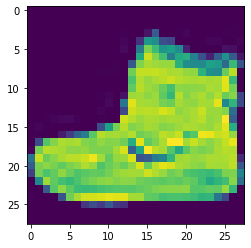

In [341]:
plt.imshow(training_images[0])

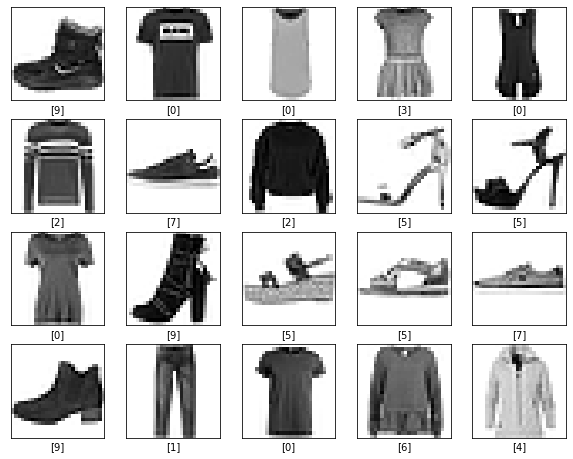

In [342]:
plt.figure(figsize=(10,10))
for i in range (20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(training_images[i],cmap = plt.cm.binary)
  plt.xlabel([training_labels[i]])

In [0]:
shape_of_train_data = training_images.shape
shape_of_test_data  = testing_images.shape
num_of_train_data   = training_images.shape[0]
num_of_test_data    = testing_images.shape[0]
shape_of_image_hor  = training_images.shape[1]
shape_of_image_vert = training_images.shape[2]
number_of_dimensions= shape_of_image_hor*shape_of_image_vert

label_list =[]
for label in training_labels:
  if label not in label_list:
    label_list.append(label)
number_of_labels = len(label_list)

In [344]:
print('shape of training_data: '+ str(shape_of_train_data))
print('shape of testing_data : '+ str(shape_of_test_data))
print('num of training data  : '+ str(num_of_train_data))
print('num of testing data   : '+ str(num_of_test_data))
print('shape of an image     : '+ str(shape_of_image_hor) + ' x ' + str(shape_of_image_vert) + ' pixels')
print('Number of Dimensions  : '+ str(number_of_dimensions))
print('labels                : '+ str(sorted(label_list)))
print('Number of Labels      : '+ str(number_of_labels))

shape of training_data: (60000, 28, 28)
shape of testing_data : (10000, 28, 28)
num of training data  : 60000
num of testing data   : 10000
shape of an image     : 28 x 28 pixels
Number of Dimensions  : 784
labels                : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Number of Labels      : 10


**Step 3: Flattening Images**

In [0]:
data = MNISTDataset(training_images.reshape([-1,number_of_dimensions]),training_labels,
                    testing_images.reshape([-1,number_of_dimensions]),testing_labels, 
                                           batch_size=128 )


In [346]:
print('New shape of Training Images: ' + str(data.train_data.shape))
print('New shape of Testing Images : ' + str(data.test_data.shape))

New shape of Training Images: (60000, 784)
New shape of Testing Images : (10000, 784)


**Step 4: Defining and Training Model**

In [0]:
num_of_steps = 2000
learning_rate1 = 0.1
number_of_units_in_layer1 = 128

In [0]:
w1 = tf.Variable(tf.random.uniform([number_of_dimensions,number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b1 = tf.Variable(tf.random.uniform([number_of_units_in_layer1],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

w2 = tf.Variable(tf.random.uniform([number_of_units_in_layer1,number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))
b2 = tf.Variable(tf.random.uniform([number_of_labels],minval = -0.1, maxval=0.1,dtype=tf.dtypes.float32))

In [349]:
print('Shape of weight matrix of hidden layer "w1": ' + str(w1.shape))
print('Shape of bias matrix of hidden layer "b1"  : ' + str(b1.shape))

print('Shape of weight matrix of output layer "w2": ' + str(w2.shape))
print('Shape of bias matrix of output layer "b2"  : ' + str(b2.shape))

Shape of weight matrix of hidden layer "w1": (784, 128)
Shape of bias matrix of hidden layer "b1"  : (128,)
Shape of weight matrix of output layer "w2": (128, 10)
Shape of bias matrix of output layer "b2"  : (10,)


In [354]:
loss_list = []
step_list = []
for step in range(num_of_steps):
  image_batch,label_batch = data.next_batch()  #This will update the batch size after every steps
  with tf.GradientTape() as tape:#for monitoring every change to tensors
    #logits1 = tf.matmul(image_batch,w1)+b1# image_batch.shape = (128 x 784), w1.shape= (784x128), 
    # image_batch x w1 = logits1, logits1 = (128x128)
    hidden1 = tf.nn.relu(tf.matmul(image_batch,w1)+b1)
    logits = tf.matmul(hidden1,w2)+b2

    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=label_batch))
    loss_list.append(loss)
  grads = tape.gradient(loss, [w2,b2,w1,b1])
  w2.assign_sub(learning_rate1*grads[0])#updating weights
  b2.assign_sub(learning_rate1*grads[1])#updating 
  w1.assign_sub(learning_rate1*grads[2])
  b1.assign_sub(learning_rate1*grads[3])
  
  step_list.append(step)
  

  if not step%100:# updating after 100 steps only
    preds = tf.argmax(logits,axis = 1, output_type = tf.int32)#selecting max value's index
    acc   = (tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),tf.float32)))*100# comparing predicted value and actual value
    #returning a binary output. Further checking number of correct classification and calculating accuracy.
    print("Loss: {}, Accuracy on Training Data: {}".format(loss,acc))
    

Loss: 0.2660481035709381, Accuracy on Training Data: 89.0625
Loss: 0.2626510560512543, Accuracy on Training Data: 89.0625
Loss: 0.23624131083488464, Accuracy on Training Data: 89.84375
Starting new epoch...
Loss: 0.2057209610939026, Accuracy on Training Data: 95.3125
Loss: 0.3658924102783203, Accuracy on Training Data: 85.15625
Loss: 0.3105527460575104, Accuracy on Training Data: 86.71875
Loss: 0.3164632320404053, Accuracy on Training Data: 85.9375
Starting new epoch...
Loss: 0.31536561250686646, Accuracy on Training Data: 88.28125
Loss: 0.35820892453193665, Accuracy on Training Data: 82.8125
Loss: 0.37553414702415466, Accuracy on Training Data: 89.0625
Loss: 0.2869904637336731, Accuracy on Training Data: 89.84375
Loss: 0.3967123031616211, Accuracy on Training Data: 88.28125
Starting new epoch...
Loss: 0.4832926094532013, Accuracy on Training Data: 79.6875
Loss: 0.2950604557991028, Accuracy on Training Data: 89.0625
Loss: 0.3326323926448822, Accuracy on Training Data: 87.5
Loss: 0.2467

**Step 5: Checking Model Performance on Testing Data**

In [355]:
test_prediction1 = tf.nn.relu(tf.matmul(data.test_data,w1)+b1)
test_predictions = tf.argmax(tf.matmul(test_prediction1,w2)+b2, axis = 1, output_type= tf.int32)
acc = (tf.reduce_mean(tf.cast(tf.equal(test_predictions, data.test_labels),tf.float32)))*100
print(' Accuracy on Testing Data: {}'.format(acc))

 Accuracy on Testing Data: 86.86000061035156


Text(0, 0.5, 'Loss')

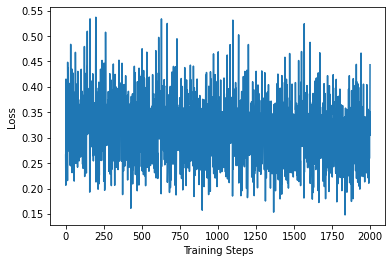

In [356]:
plt.figure()
plt.plot(step_list,loss_list)
plt.xlabel('Training Steps')
plt.ylabel('Loss')

**Step 6: Partial Validation of Model**

In [0]:
ind1, ind2,ind3,ind4,ind5 = 5678, 8765, 6857, 85, 9

      Model Prediction: 3
      Actual Label    : 3


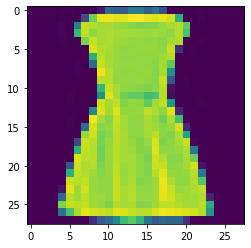

In [359]:
plt.imshow(testing_images[ind1])
plt.show
print('      Model Prediction: {}'.format(test_predictions[ind1]))
print('      Actual Label    : {}'.format(data.test_labels[ind1]))

      Model Prediction: 5
      Actual Label    : 5


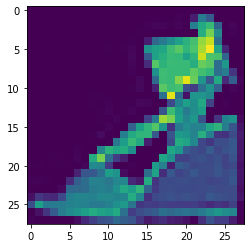

In [360]:
plt.imshow(testing_images[ind2])
plt.show
print('      Model Prediction: {}'.format(test_predictions[ind2]))
print('      Actual Label    : {}'.format(data.test_labels[ind2]))

      Model Prediction: 7
      Actual Label    : 7


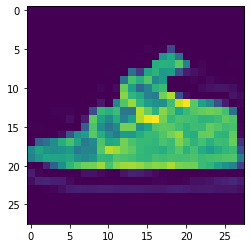

In [361]:
plt.imshow(testing_images[ind3])
plt.show
print('      Model Prediction: {}'.format(test_predictions[ind3]))
print('      Actual Label    : {}'.format(data.test_labels[ind3]))

      Model Prediction: 0
      Actual Label    : 0


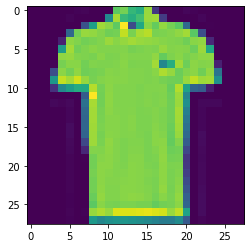

In [362]:
plt.imshow(testing_images[ind4])
plt.show
print('      Model Prediction: {}'.format(test_predictions[ind4]))
print('      Actual Label    : {}'.format(data.test_labels[ind4]))

      Model Prediction: 7
      Actual Label    : 7


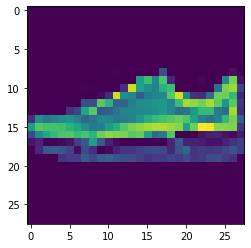

In [363]:
plt.imshow(testing_images[ind5])
plt.show
print('      Model Prediction: {}'.format(test_predictions[ind5]))
print('      Actual Label    : {}'.format(data.test_labels[ind5]))